<a href="https://colab.research.google.com/github/czynot/telecom-churn-prediction/blob/main/telecom_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Import

Telecom Dataset : https://www.kaggle.com/radmirzosimov/telecom-users-dataset

In [1]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
path = '/content/drive/My Drive/datasets/telecom_users.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Data Glossary



*   **customerID** - customer id
gender - client gender (male / female)
*   **SeniorCitizen** - is the client retired (1, 0)
*   **Partner** - is the client married (Yes, No)
*   **tenure** - how many months a person has been a client of the company
*   **PhoneService** - is the telephone service connected (Yes, No)
*   **MultipleLines** - are multiple phone lines connected (Yes, No, No phone service)
*   **InternetService** - client's Internet service provider (DSL, Fiber optic, No)
*   **OnlineSecurity** - is the online security service connected (Yes, No, No internet service)
*   **OnlineBackup** - is the online backup service activated (Yes, No, No internet service)
*   **DeviceProtection** - does the client have equipment insurance (Yes, No, No internet service)
*   **TechSupport** - is the technical support service connected (Yes, No, No internet service)
*   **StreamingTV** - is the streaming TV service connected (Yes, No, No internet service)
*   **StreamingMovies** - is the streaming cinema service activated (Yes, No, No internet service)
*   **Contract** - type of customer contract (Month-to-month, One year, Two year)
*   **PaperlessBilling** - whether the client uses paperless billing (Yes, No)
*   **PaymentMethod** - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   **MonthlyCharges** - current monthly payment
*   **TotalCharges** - the total amount that the client paid for the services for the entire time
*   **Churn** - whether there was a churn (Yes or No)





# Exploratory Data Analysis

In [6]:
data = data.drop(columns=['Unnamed: 0', 'customerID'])

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [9]:
data['TotalCharges'].value_counts()

           10
20.2       10
19.75       8
19.55       7
19.9        6
           ..
669         1
811.8       1
2874.45     1
5502.55     1
224.05      1
Name: TotalCharges, Length: 5611, dtype: int64

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(r'^\s*$', 0, regex=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [14]:

fig.show()fig = px.treemap(data.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='count'),
                 path=['gender', 'Partner', 'Dependents', 'Churn'], values = 'count', color='Churn')

In [15]:
fig = px.histogram(data.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                 x = 'tenure', y = 'count', color='Churn')
fig.show()

In [16]:
fig = px.sunburst(data.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count'),
                  path=['Churn', 'PhoneService', 'InternetService'], values = 'count', color='Churn')
fig.show()

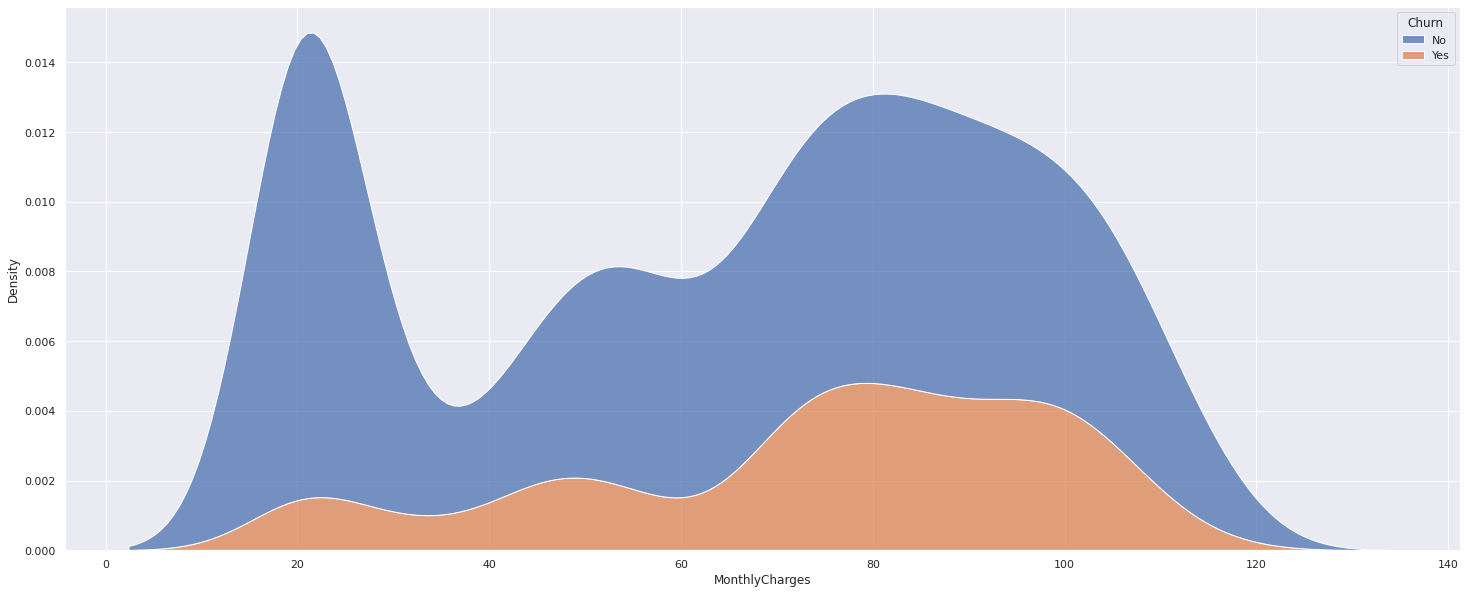

In [18]:
sns.set(rc={'figure.figsize':(25,10)})
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack')

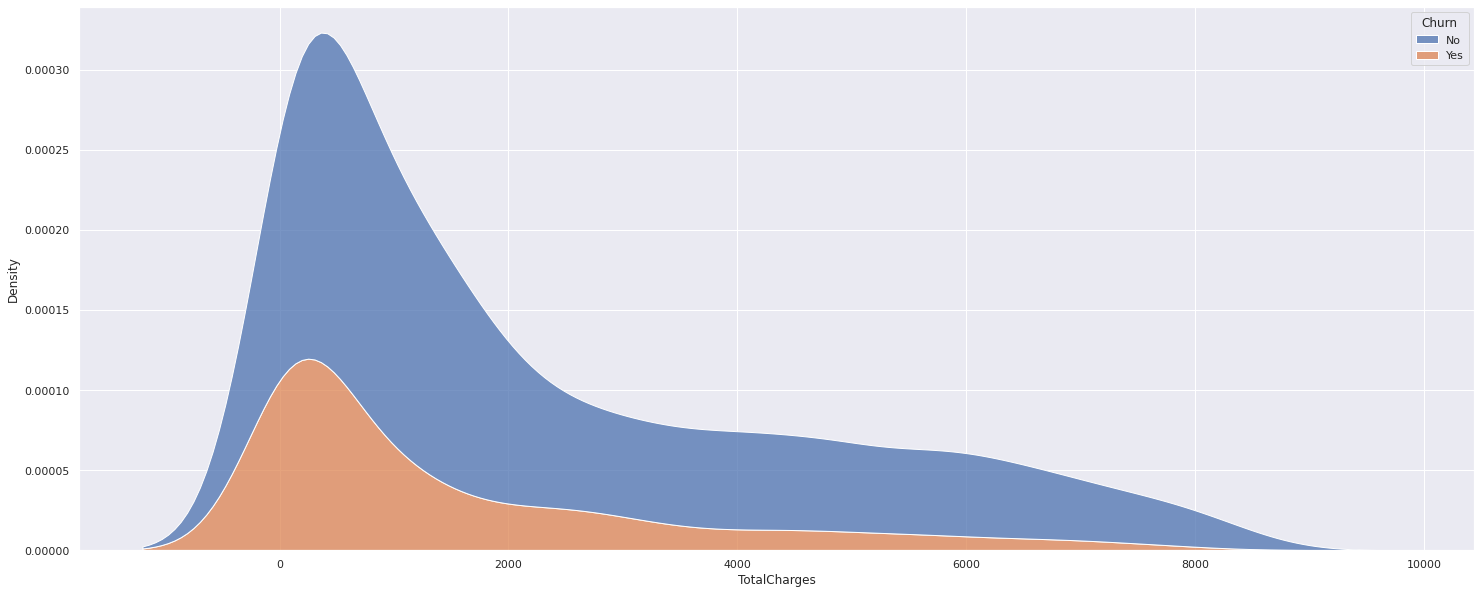

In [19]:
sns.set(rc={'figure.figsize':(25,10)})
sns.kdeplot(data=data, x='TotalCharges', hue='Churn', multiple='stack')

# Data Pre-processing

In [20]:
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', 'Dependents']

In [22]:
data_processed = pd.get_dummies(data, prefix_sep='__', columns=cat_columns)

In [23]:
data_processed.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender__Female,gender__Male,SeniorCitizen__0,SeniorCitizen__1,Partner__No,Partner__Yes,PhoneService__No,PhoneService__Yes,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,InternetService__DSL,InternetService__Fiber optic,InternetService__No,OnlineSecurity__No,OnlineSecurity__No internet service,OnlineSecurity__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes,DeviceProtection__No,DeviceProtection__No internet service,DeviceProtection__Yes,TechSupport__No,TechSupport__No internet service,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaperlessBilling__No,PaperlessBilling__Yes,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,Dependents__No,Dependents__Yes
0,72,24.10,1734.65,No,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
1,44,88.15,3973.20,No,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,38,74.95,2869.85,Yes,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
3,4,55.90,238.50,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
4,2,53.45,119.50,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [24]:
data_processed['Churn'] = np.where(data_processed['Churn'].str.contains('Yes'), 1, 0)

In [25]:
cat_dummies = [col for col in data_processed
               if '__' in col
               and col.split('__')[0] in cat_columns]

with open('cat_dummies.txt', 'w') as filehandle:
    for listitem in cat_dummies:
        filehandle.write('%s\n' % listitem)

In [26]:
processed_columns = list(data_processed.columns[:])

with open('processed_columns.txt', 'w') as filehandle:
    for listitem in processed_columns:
        filehandle.write('%s\n' % listitem)

In [28]:
data_processed['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [33]:
features = data_processed.drop(['Churn'], axis=1)
targets = data_processed[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [37]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(x_train, y_train)

print('Accuracy: ', metrics.accuracy_score(y_test, model.predict(x_test)))
print('Recall Score: ', metrics.recall_score(y_test, model.predict(x_test), average='weighted'))
print('Precision Score: ', metrics.precision_score(y_test, model.predict(x_test), average='weighted'))
print('F1 Score: ', metrics.f1_score(y_test, model.predict(x_test), average='weighted'))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, model.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy:  0.8063439065108514
Recall Score:  0.8063439065108514
Precision Score:  0.7978525894830667
F1 Score:  0.8001391971967932
Confusion Matrix: 
 [[794  89]
 [143 172]]


In [38]:
import pickle

with open('classifier.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [39]:
from google.colab import files

files.download('cat_dummies.txt')
files.download('processed_columns.txt')
files.download('classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>